In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df1=pd.read_csv('/content/Railway Ticket Confirmation.csv')
df1.head()

,PNR Number,Train Number,Date of Journey,Class of Travel,Quota,Source Station,Destination Station,Booking Date,Current Status,Number of Passengers,...,Booking Channel,Travel Distance,Number of Stations,Travel Time,Train Type,Seat Availability,Special Considerations,Holiday or Peak Season,Waitlist Position,Confirmation Status
0,PNR0000000000,51450,2024-09-01,3AC,General,NDLS,CSMT,2024-01-01,Confirmed,4,...,Counter,1656,17,37,Shatabdi,159,Senior Citizen,Yes,NaN,Confirmed
1,PNR0000000001,54807,2024-09-02,3AC,Premium Tatkal,MMCT,LTT,2024-01-02,Waitlisted,5,...,Mobile App,1932,18,6,Shatabdi,309,NaN,Yes,WL097,Not Confirmed
2,PNR0000000002,14396,2024-09-03,3AC,Ladies,GKP,BBS,2024-01-03,RAC,5,...,IRCTC Website,155,4,17,Express,143,NaN,Yes,NaN,Confirmed
3,PNR0000000003,20295,2024-09-04,3AC,Ladies,ASR,KOAA,2024-01-04,Waitlisted,1,...,Counter,1840,5,16,Superfast,256,Senior Citizen,No,WL011,Not Confirmed
4,PNR0000000004,48598,2024-09-05,2AC,Tatkal,MAS,SBC,2024-01-05,Confirmed,3,...,Mobile App,1766,9,32,Express,58,NaN,Yes,NaN,Confirmed


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   PNR Number              30000 non-null  object
 1   Train Number            30000 non-null  int64 
 2   Date of Journey         30000 non-null  object
 3   Class of Travel         30000 non-null  object
 4   Quota                   30000 non-null  object
 5   Source Station          30000 non-null  object
 6   Destination Station     30000 non-null  object
 7   Booking Date            30000 non-null  object
 8   Current Status          30000 non-null  object
 9   Number of Passengers    30000 non-null  int64 
 10  Age of Passengers       30000 non-null  object
 11  Booking Channel         30000 non-null  object
 12  Travel Distance         30000 non-null  int64 
 13  Number of Stations      30000 non-null  int64 
 14  Travel Time             30000 non-null  int64 
 15  Tr

dropping those features which are not of our use like PNR number ,Train number.

In [ ]:
df2=df1.drop(['PNR Number','Train Number'],axis='columns')
df2.head()

,Date of Journey,Class of Travel,Quota,Source Station,Destination Station,Booking Date,Current Status,Number of Passengers,Age of Passengers,Booking Channel,Travel Distance,Number of Stations,Travel Time,Train Type,Seat Availability,Special Considerations,Holiday or Peak Season,Waitlist Position,Confirmation Status
0,2024-09-01,3AC,General,NDLS,CSMT,2024-01-01,Confirmed,4,Child,Counter,1656,17,37,Shatabdi,159,Senior Citizen,Yes,NaN,Confirmed
1,2024-09-02,3AC,Premium Tatkal,MMCT,LTT,2024-01-02,Waitlisted,5,Senior Citizen,Mobile App,1932,18,6,Shatabdi,309,NaN,Yes,WL097,Not Confirmed
2,2024-09-03,3AC,Ladies,GKP,BBS,2024-01-03,RAC,5,Adult,IRCTC Website,155,4,17,Express,143,NaN,Yes,NaN,Confirmed
3,2024-09-04,3AC,Ladies,ASR,KOAA,2024-01-04,Waitlisted,1,Senior Citizen,Counter,1840,5,16,Superfast,256,Senior Citizen,No,WL011,Not Confirmed
4,2024-09-05,2AC,Tatkal,MAS,SBC,2024-01-05,Confirmed,3,Child,Mobile App,1766,9,32,Express,58,NaN,Yes,NaN,Confirmed


In [ ]:
#finding out the number of unique values in each feature having object data type
for column in df2.select_dtypes(include='object').columns:
  print(f"Unique values in {column}: {df2[column].nunique()}")

Unique values in Date of Journey: 30000
Unique values in Class of Travel: 4
Unique values in Quota: 4
Unique values in Source Station: 23
Unique values in Destination Station: 23
Unique values in Booking Date: 30000
Unique values in Current Status: 3
Unique values in Age of Passengers: 3
Unique values in Booking Channel: 3
Unique values in Train Type: 4
Unique values in Special Considerations: 2
Unique values in Holiday or Peak Season: 2
Unique values in Waitlist Position: 200
Unique values in Confirmation Status: 2


Now let's look at the effect of booking date on the confirmation of ticket. For that we will consider the difference in the data of booking and journey date.

In [ ]:
#finding out the total value count in each variable
for col in df2.columns:
  count=df2[col].value_counts()
  print(count)


Date of Journey
2024-09-01    1
2079-06-01    1
2079-06-13    1
2079-06-12    1
2079-06-11    1
             ..
2052-01-13    1
2052-01-12    1
2052-01-11    1
2052-01-10    1
2106-10-21    1
Name: count, Length: 30000, dtype: int64
Class of Travel
Sleeper    7613
1AC        7482
3AC        7460
2AC        7445
Name: count, dtype: int64
Quota
Ladies            7655
General           7501
Tatkal            7444
Premium Tatkal    7400
Name: count, dtype: int64
Source Station
BBS     1364
NDLS    1356
CNB     1354
SC      1344
KOAA    1342
UMB     1333
PNBE    1324
MMCT    1318
ASR     1314
BCT     1308
GKP     1301
MAS     1301
JU      1300
ADI     1299
BSB     1295
HWH     1293
JP      1288
SBC     1286
LKO     1285
CSMT    1267
JHS     1258
LTT     1250
NJP     1220
Name: count, dtype: int64
Destination Station
GKP     1370
JP      1357
NJP     1342
MAS     1336
SC      1333
LKO     1322
CSMT    1318
LTT     1315
HWH     1315
NDLS    1312
MMCT    1310
PNBE    1309
UMB     1301
ASR     

In [ ]:
df2['Date of Journey'] = pd.to_datetime(df2['Date of Journey'], format = '%Y-%m-%d')
df2['Booking Date'] = pd.to_datetime(df2['Booking Date'], format = '%Y-%m-%d')
df2['days_difference'] = (df2['Date of Journey'] - df2['Booking Date']).dt.days
df2.head()

,Date of Journey,Class of Travel,Quota,Source Station,Destination Station,Booking Date,Current Status,Number of Passengers,Age of Passengers,Booking Channel,Travel Distance,Number of Stations,Travel Time,Train Type,Seat Availability,Special Considerations,Holiday or Peak Season,Waitlist Position,Confirmation Status,days_difference
0,2024-09-01,3AC,General,NDLS,CSMT,2024-01-01,Confirmed,4,Child,Counter,1656,17,37,Shatabdi,159,Senior Citizen,Yes,NaN,Confirmed,244
1,2024-09-02,3AC,Premium Tatkal,MMCT,LTT,2024-01-02,Waitlisted,5,Senior Citizen,Mobile App,1932,18,6,Shatabdi,309,NaN,Yes,WL097,Not Confirmed,244
2,2024-09-03,3AC,Ladies,GKP,BBS,2024-01-03,RAC,5,Adult,IRCTC Website,155,4,17,Express,143,NaN,Yes,NaN,Confirmed,244
3,2024-09-04,3AC,Ladies,ASR,KOAA,2024-01-04,Waitlisted,1,Senior Citizen,Counter,1840,5,16,Superfast,256,Senior Citizen,No,WL011,Not Confirmed,244
4,2024-09-05,2AC,Tatkal,MAS,SBC,2024-01-05,Confirmed,3,Child,Mobile App,1766,9,32,Express,58,NaN,Yes,NaN,Confirmed,244


In [ ]:
df2['days_difference'].nunique()

1

Since the gap between date of journey and booking date is same in all the cases it would be of no use.

In [ ]:
df3=df2.drop(['Date of Journey','Booking Date','days_difference'],axis='columns')
df3.head()

,Class of Travel,Quota,Source Station,Destination Station,Current Status,Number of Passengers,Age of Passengers,Booking Channel,Travel Distance,Number of Stations,Travel Time,Train Type,Seat Availability,Special Considerations,Holiday or Peak Season,Waitlist Position,Confirmation Status
0,3AC,General,NDLS,CSMT,Confirmed,4,Child,Counter,1656,17,37,Shatabdi,159,Senior Citizen,Yes,NaN,Confirmed
1,3AC,Premium Tatkal,MMCT,LTT,Waitlisted,5,Senior Citizen,Mobile App,1932,18,6,Shatabdi,309,NaN,Yes,WL097,Not Confirmed
2,3AC,Ladies,GKP,BBS,RAC,5,Adult,IRCTC Website,155,4,17,Express,143,NaN,Yes,NaN,Confirmed
3,3AC,Ladies,ASR,KOAA,Waitlisted,1,Senior Citizen,Counter,1840,5,16,Superfast,256,Senior Citizen,No,WL011,Not Confirmed
4,2AC,Tatkal,MAS,SBC,Confirmed,3,Child,Mobile App,1766,9,32,Express,58,NaN,Yes,NaN,Confirmed


In [ ]:
#finding out the total value count in each variable
for col in df3.columns:
  count=df3[col].value_counts()
  print(count)

Class of Travel
Sleeper    7613
1AC        7482
3AC        7460
2AC        7445
Name: count, dtype: int64
Quota
Ladies            7655
General           7501
Tatkal            7444
Premium Tatkal    7400
Name: count, dtype: int64
Source Station
BBS     1364
NDLS    1356
CNB     1354
SC      1344
KOAA    1342
UMB     1333
PNBE    1324
MMCT    1318
ASR     1314
BCT     1308
GKP     1301
MAS     1301
JU      1300
ADI     1299
BSB     1295
HWH     1293
JP      1288
SBC     1286
LKO     1285
CSMT    1267
JHS     1258
LTT     1250
NJP     1220
Name: count, dtype: int64
Destination Station
GKP     1370
JP      1357
NJP     1342
MAS     1336
SC      1333
LKO     1322
CSMT    1318
LTT     1315
HWH     1315
NDLS    1312
MMCT    1310
PNBE    1309
UMB     1301
ASR     1299
BBS     1296
JHS     1291
CNB     1280
ADI     1278
JU      1271
KOAA    1267
SBC     1262
BSB     1259
BCT     1257
Name: count, dtype: int64
Current Status
Waitlisted    10053
RAC           10029
Confirmed      9918
Name: coun

In [ ]:
df3.head()

,Class of Travel,Quota,Source Station,Destination Station,Current Status,Number of Passengers,Age of Passengers,Booking Channel,Travel Distance,Number of Stations,Travel Time,Train Type,Seat Availability,Special Considerations,Holiday or Peak Season,Waitlist Position,Confirmation Status
0,3AC,General,NDLS,CSMT,Confirmed,4,Child,Counter,1656,17,37,Shatabdi,159,Senior Citizen,Yes,NaN,Confirmed
1,3AC,Premium Tatkal,MMCT,LTT,Waitlisted,5,Senior Citizen,Mobile App,1932,18,6,Shatabdi,309,NaN,Yes,WL097,Not Confirmed
2,3AC,Ladies,GKP,BBS,RAC,5,Adult,IRCTC Website,155,4,17,Express,143,NaN,Yes,NaN,Confirmed
3,3AC,Ladies,ASR,KOAA,Waitlisted,1,Senior Citizen,Counter,1840,5,16,Superfast,256,Senior Citizen,No,WL011,Not Confirmed
4,2AC,Tatkal,MAS,SBC,Confirmed,3,Child,Mobile App,1766,9,32,Express,58,NaN,Yes,NaN,Confirmed


In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Class of Travel         30000 non-null  object
 1   Quota                   30000 non-null  object
 2   Source Station          30000 non-null  object
 3   Destination Station     30000 non-null  object
 4   Current Status          30000 non-null  object
 5   Number of Passengers    30000 non-null  int64 
 6   Age of Passengers       30000 non-null  object
 7   Booking Channel         30000 non-null  object
 8   Travel Distance         30000 non-null  int64 
 9   Number of Stations      30000 non-null  int64 
 10  Travel Time             30000 non-null  int64 
 11  Train Type              30000 non-null  object
 12  Seat Availability       30000 non-null  int64 
 13  Special Considerations  20045 non-null  object
 14  Holiday or Peak Season  30000 non-null  object
 15  Wa

In [ ]:
df4=df3.drop(['Travel Distance','Seat Availability','Waitlist Position'],axis='columns')

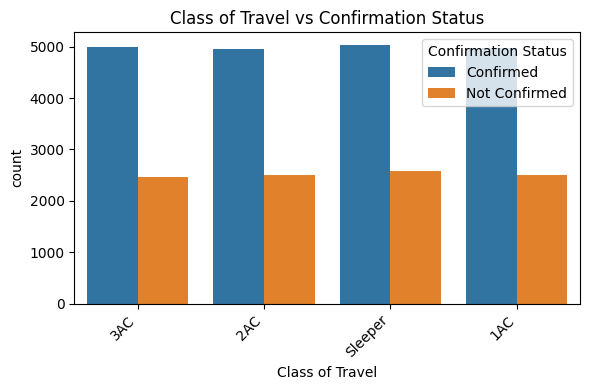

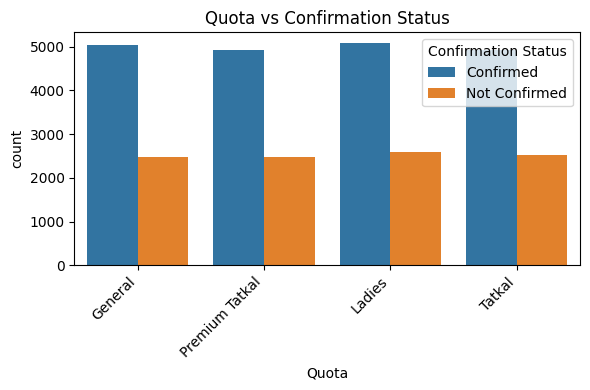

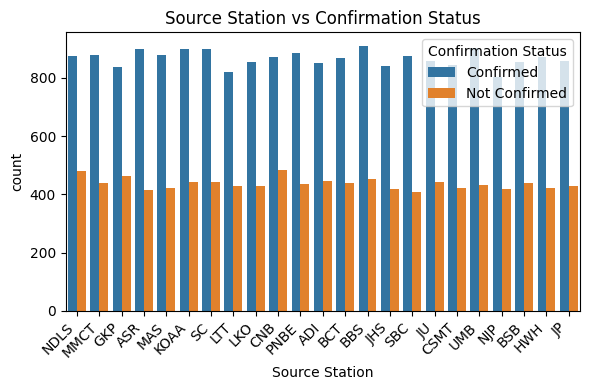

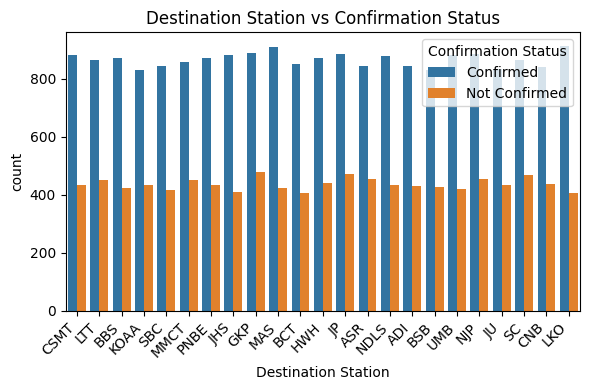

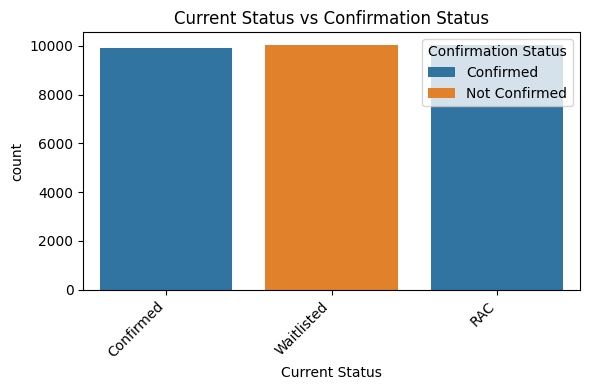

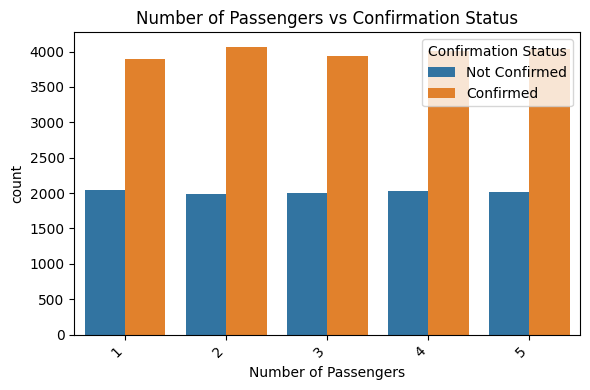

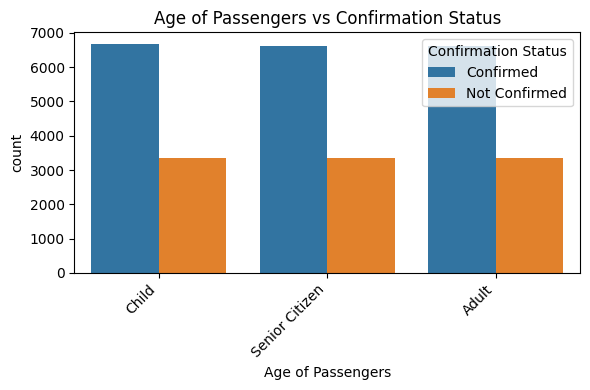

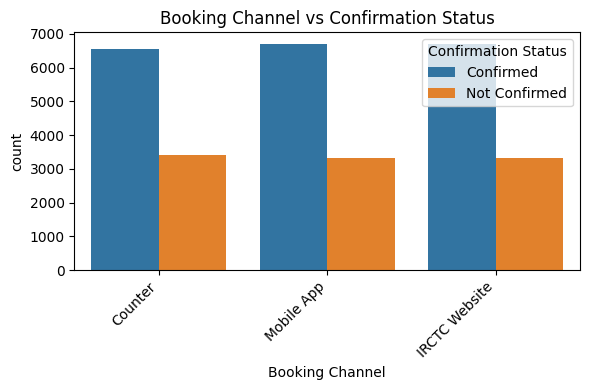

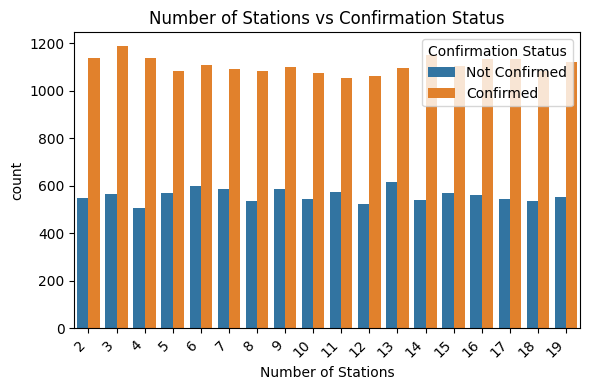

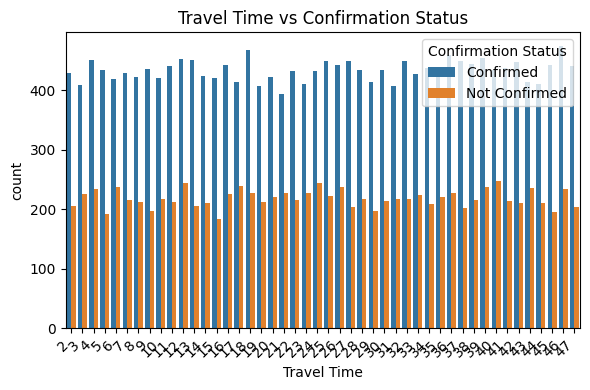

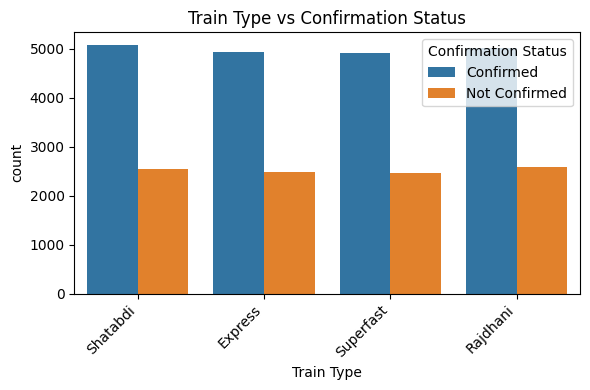

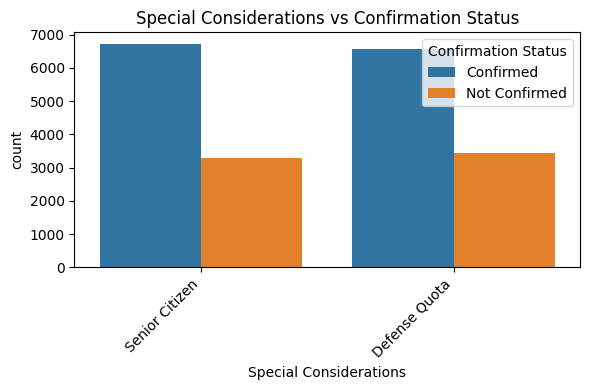

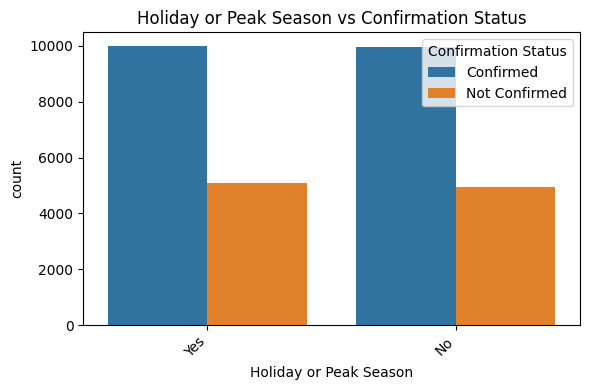

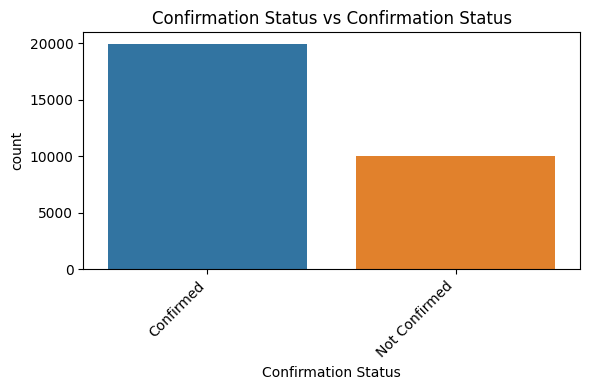

In [ ]:
for column in df4.columns:
    if column != ['Confirmation Status','Travel Distance','Seat Availability']:
        plt.figure(figsize=(6, 4))
        sns.countplot(data=df4, x=column, hue='Confirmation Status')
        plt.title(f'{column} vs Confirmation Status')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

In [ ]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Class of Travel         30000 non-null  object
 1   Quota                   30000 non-null  object
 2   Source Station          30000 non-null  object
 3   Destination Station     30000 non-null  object
 4   Current Status          30000 non-null  object
 5   Number of Passengers    30000 non-null  int64 
 6   Age of Passengers       30000 non-null  object
 7   Booking Channel         30000 non-null  object
 8   Number of Stations      30000 non-null  int64 
 9   Travel Time             30000 non-null  int64 
 10  Train Type              30000 non-null  object
 11  Special Considerations  20045 non-null  object
 12  Holiday or Peak Season  30000 non-null  object
 13  Confirmation Status     30000 non-null  object
dtypes: int64(3), object(11)
memory usage: 3.2+ MB


In [ ]:
df4=df4.drop(['Source Station','Destination Station'],axis='columns')
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Class of Travel         30000 non-null  object
 1   Quota                   30000 non-null  object
 2   Current Status          30000 non-null  object
 3   Number of Passengers    30000 non-null  int64 
 4   Age of Passengers       30000 non-null  object
 5   Booking Channel         30000 non-null  object
 6   Number of Stations      30000 non-null  int64 
 7   Travel Time             30000 non-null  int64 
 8   Train Type              30000 non-null  object
 9   Special Considerations  20045 non-null  object
 10  Holiday or Peak Season  30000 non-null  object
 11  Confirmation Status     30000 non-null  object
dtypes: int64(3), object(9)
memory usage: 2.7+ MB


In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Class of Travel         30000 non-null  object
 1   Quota                   30000 non-null  object
 2   Source Station          30000 non-null  object
 3   Destination Station     30000 non-null  object
 4   Current Status          30000 non-null  object
 5   Number of Passengers    30000 non-null  int64 
 6   Age of Passengers       30000 non-null  object
 7   Booking Channel         30000 non-null  object
 8   Travel Distance         30000 non-null  int64 
 9   Number of Stations      30000 non-null  int64 
 10  Travel Time             30000 non-null  int64 
 11  Train Type              30000 non-null  object
 12  Seat Availability       30000 non-null  int64 
 13  Special Considerations  20045 non-null  object
 14  Holiday or Peak Season  30000 non-null  object
 15  Wa

In [ ]:
df3=df3.drop(['Waitlist Position'],axis='columns')

In [ ]:
for col in df3.select_dtypes(include='object').columns:
        df3 = pd.get_dummies(df3, columns=[col], prefix=col)
        df3.head()

In [ ]:
df3.head()

,Number of Passengers,Travel Distance,Number of Stations,Travel Time,Seat Availability,Class of Travel_1AC,Class of Travel_2AC,Class of Travel_3AC,Class of Travel_Sleeper,Quota_General,...,Train Type_Express,Train Type_Rajdhani,Train Type_Shatabdi,Train Type_Superfast,Special Considerations_Defense Quota,Special Considerations_Senior Citizen,Holiday or Peak Season_No,Holiday or Peak Season_Yes,Confirmation Status_Confirmed,Confirmation Status_Not Confirmed
0,4,1656,17,37,159,False,False,True,False,True,...,False,False,True,False,False,True,False,True,True,False
1,5,1932,18,6,309,False,False,True,False,False,...,False,False,True,False,False,False,False,True,False,True
2,5,155,4,17,143,False,False,True,False,False,...,True,False,False,False,False,False,False,True,True,False
3,1,1840,5,16,256,False,False,True,False,False,...,False,False,False,True,False,True,True,False,False,True
4,3,1766,9,32,58,False,True,False,False,False,...,True,False,False,False,False,False,False,True,True,False


In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 78 columns):
 #   Column                                 Non-Null Count  Dtype
---  ------                                 --------------  -----
 0   Number of Passengers                   30000 non-null  int64
 1   Travel Distance                        30000 non-null  int64
 2   Number of Stations                     30000 non-null  int64
 3   Travel Time                            30000 non-null  int64
 4   Seat Availability                      30000 non-null  int64
 5   Class of Travel_1AC                    30000 non-null  bool 
 6   Class of Travel_2AC                    30000 non-null  bool 
 7   Class of Travel_3AC                    30000 non-null  bool 
 8   Class of Travel_Sleeper                30000 non-null  bool 
 9   Quota_General                          30000 non-null  bool 
 10  Quota_Ladies                           30000 non-null  bool 
 11  Quota_Premium Tatkal        

In [ ]:
df5=df3.drop(['Holiday or Peak Season_No','Confirmation Status_Not Confirmed'],axis='columns')
df5.head()

,Number of Passengers,Travel Distance,Number of Stations,Travel Time,Seat Availability,Class of Travel_1AC,Class of Travel_2AC,Class of Travel_3AC,Class of Travel_Sleeper,Quota_General,...,Booking Channel_IRCTC Website,Booking Channel_Mobile App,Train Type_Express,Train Type_Rajdhani,Train Type_Shatabdi,Train Type_Superfast,Special Considerations_Defense Quota,Special Considerations_Senior Citizen,Holiday or Peak Season_Yes,Confirmation Status_Confirmed
0,4,1656,17,37,159,False,False,True,False,True,...,False,False,False,False,True,False,False,True,True,True
1,5,1932,18,6,309,False,False,True,False,False,...,False,True,False,False,True,False,False,False,True,False
2,5,155,4,17,143,False,False,True,False,False,...,True,False,True,False,False,False,False,False,True,True
3,1,1840,5,16,256,False,False,True,False,False,...,False,False,False,False,False,True,False,True,False,False
4,3,1766,9,32,58,False,True,False,False,False,...,False,True,True,False,False,False,False,False,True,True


In [ ]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 76 columns):
 #   Column                                 Non-Null Count  Dtype
---  ------                                 --------------  -----
 0   Number of Passengers                   30000 non-null  int64
 1   Travel Distance                        30000 non-null  int64
 2   Number of Stations                     30000 non-null  int64
 3   Travel Time                            30000 non-null  int64
 4   Seat Availability                      30000 non-null  int64
 5   Class of Travel_1AC                    30000 non-null  bool 
 6   Class of Travel_2AC                    30000 non-null  bool 
 7   Class of Travel_3AC                    30000 non-null  bool 
 8   Class of Travel_Sleeper                30000 non-null  bool 
 9   Quota_General                          30000 non-null  bool 
 10  Quota_Ladies                           30000 non-null  bool 
 11  Quota_Premium Tatkal        

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
X = df5.drop('Confirmation Status_Confirmed', axis=1)  # Features
y = df3['Confirmation Status_Confirmed'] # Target variable

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42) # You can adjust n_estimators
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = rf_classifier.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("The accuracy of the model is:",accuracy)


The accuracy of the model is: 1.0


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00      2020
        True       1.00      1.00      1.00      3980

    accuracy                           1.00      6000
   macro avg       1.00      1.00      1.00      6000
weighted avg       1.00      1.00      1.00      6000



In [ ]:
rf_classifier.predict([['5','1932','18','6','309','0','0','1','0','0','0','1','0','0','0','0','0','0','0','0','0','0','0','0','0','0','0','0','0','1','0','0','0','0','0','0','0','0','0','0','0','0','0','0','0','0','0','0','0','0','1','0','0','0','0','0','0','0','0','0','0','1','0','0','1','0','0','1','0','0','1','0','0','0','1']])

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([False])